# Data Transformation Techniques for Machine Learning

### 1. Type One: Function Transformations

performing transformations on data using mathematical functions

**a.** **Log Transformation**  
This technique is applied to reduce the impact of extreme values.
It makes the data close to normal distribution  
It may not be applied to negative values  
It works best with right-skewed data

**Formula**  
y = log_e​(x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# synthesize skewed data
np.random.seed(100)
data_original = np.random.exponential(scale=2, size=1000)

In [5]:
# implement log transformation
data_log_transformed = np.log(data_original)

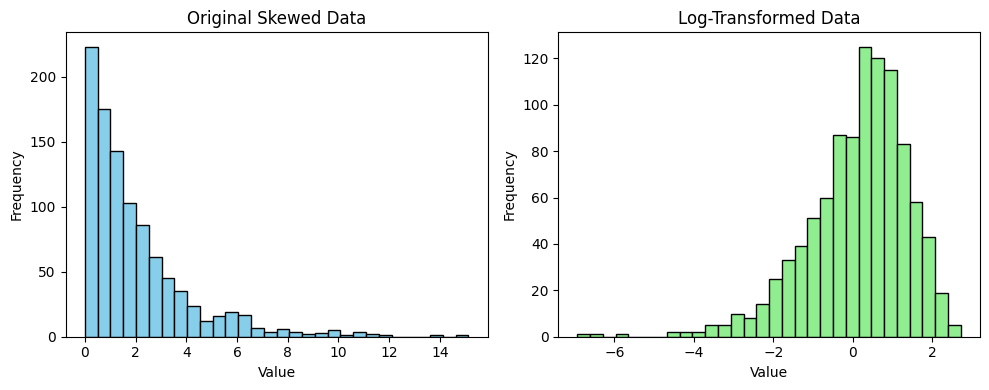

In [6]:
# visualize
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(data_original, bins=30, color='skyblue', edgecolor='black')
plt.title('Original Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_log_transformed, bins=30, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The original data (left) that was skewed, now appears to be close to a normal distribution (right)

**b.** **Reciprocal Transformation**  
Taking the reciprocal of non-zero data points(x) and changing them to their reciprocal(1/x).  
This is good for scaling down features containing large values  
In right-skewed data it can spread out the small values & bring them closer together  

**Formula**  
y = 1/x

- x is the original value  
- y is the reciprocal value

In [ ]:
np.random.seed(42) 
data_original = np.random.randint(1, 20, size=50)

In [30]:
# implement reciprocal transformation
data_reciprocal = np.reciprocal(data_original.astype(float))

In [31]:
print('original data: ', data_original)
print('transformed data: ', data_reciprocal)

original data:  [ 7 15 11  8  7 19 11 11  4  8  3  2 12  6  2  1 12 12 17 10 16 15 15 19
 12  3  5 19  7  9  7 18  4 14 18  9  2 15  7 12  8 15  3 14 17  4 18  8
  4  2]
transformed data:  [0.14285714 0.06666667 0.09090909 0.125      0.14285714 0.05263158
 0.09090909 0.09090909 0.25       0.125      0.33333333 0.5
 0.08333333 0.16666667 0.5        1.         0.08333333 0.08333333
 0.05882353 0.1        0.0625     0.06666667 0.06666667 0.05263158
 0.08333333 0.33333333 0.2        0.05263158 0.14285714 0.11111111
 0.14285714 0.05555556 0.25       0.07142857 0.05555556 0.11111111
 0.5        0.06666667 0.14285714 0.08333333 0.125      0.06666667
 0.33333333 0.07142857 0.05882353 0.25       0.05555556 0.125
 0.25       0.5       ]


**c.** **Square Transformation**  
Taking the data point and converting it to its square  
This spreads out the data to reduce skeweness and potentially achieve a more symmetrical distribution  

**Formula**  
y = x²

In [34]:
# synthesize data
data = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0 , 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
# squaring transformation
data_squared = np.square(data)

In [36]:
# display results
print('original data:', data)
print('squared data:', data_squared)

original data: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
squared data: [100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81]


**d.** **Reciprocal Transformation**  
Best used too deal with right-skewed data or a few extreme outliers.  
It takes the square root which can compress the larger values and make the distribution more symmetric  

**Formula**  
y = sqrt(x)

In [37]:
# synthesize data
data = np.array([4, 9, 16, 25, 36])

In [38]:
# square root transformation
data_sqrt = np.sqrt(data)

In [39]:
# display results
print('original data:', data)
print('square-root data:', data_sqrt)

original data: [ 4  9 16 25 36]
square-root data: [2. 3. 4. 5. 6.]


### Type Two: Power Transformations

**a.** **Box-Cox Transformation**  
Used when the data must follow a normal distribution.  
Or when it is important to stabilize the variance of the data.  
It has a parameter λ (lambda) used to control the transformation forms  
λ = 1, means no change to the data  
λ = 0, means a log transformation to the data  
λ = any number, means power transformation to the data.  

In [1]:
import numpy as np
from scipy.stats import boxcox

In [2]:
data = np.random.exponential(scale=2, size=1000)

In [4]:
data.shape

(1000,)